In [6]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_path = "/content/drive/MyDrive/Clean Tech Dataset.zip"
extract_path = "/content/Clean Tech Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")
print(os.listdir(extract_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extraction complete!
['Dataset']


In [17]:
import os

print(os.listdir("/content"))


['.config', 'Clean Tech Dataset', 'CleanTechDataset', 'drive', 'Clean Tech Dataset.zip', 'sample_data']


In [18]:
import os

print("Clean Tech Dataset contents:")
print(os.listdir("/content/Clean Tech Dataset"))

print("\nCleanTechDataset contents:")
print(os.listdir("/content/CleanTechDataset"))


Clean Tech Dataset contents:
['Dataset']

CleanTechDataset contents:
['Dataset']


In [19]:
import os

print("Inside Clean Tech Dataset/Dataset:")
print(os.listdir("/content/Clean Tech Dataset/Dataset"))

print("\nInside CleanTechDataset/Dataset:")
print(os.listdir("/content/CleanTechDataset/Dataset"))


Inside Clean Tech Dataset/Dataset:
['Trash Images', 'Biodegradable Images', 'Recyclable Images']

Inside CleanTechDataset/Dataset:
['Trash Images', 'Biodegradable Images', 'Recyclable Images']


In [20]:
DATASET_PATH = "/content/Clean Tech Dataset/Dataset"



In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Correct dataset path
DATASET_PATH = "/content/Clean Tech Dataset/Dataset"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Auto split dataset into Train & Validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)

# Save Model
model.save("/content/drive/MyDrive/VGG16_CleanTech_Waste_Model.h5")

print("✅ Training Complete — Model Saved to Google Drive")


Found 312 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 212s 21s/step - accuracy: 0.4813 - loss: 1.0788 - val_accuracy: 0.6282 - val_loss: 0.9564
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 206s 21s/step - accuracy: 0.7620 - loss: 0.5593 - val_accuracy: 0.6282 - val_loss: 0.9013
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 260s 21s/step - accuracy: 0.8259 - loss: 0.4142 - val_accuracy: 0.6154 - val_loss: 0.9688
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 204s 21s/step - accuracy: 0.8033 - loss: 0.4488 - val_accuracy: 0.5897 - val_loss: 0.9738
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 204s 21s/step - accuracy: 0.8384 - loss: 0.3693 - val_accuracy: 0.6282 - val_loss: 0.9021
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 205s 21s/step - accuracy: 0.8918 - loss: 0.2996 - val_accuracy: 0.6154 - val_loss: 0.8964
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 262s 21s/step - accuracy: 0.8660 - loss: 0.2977 - val_accuracy: 0.6410 - val_loss: 0.9934
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 203s 21s/step - accuracy: 0.9139 - loss: 0.2590 - val_accuracy: 0.

✅ Training Complete — Model Saved to Google Drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


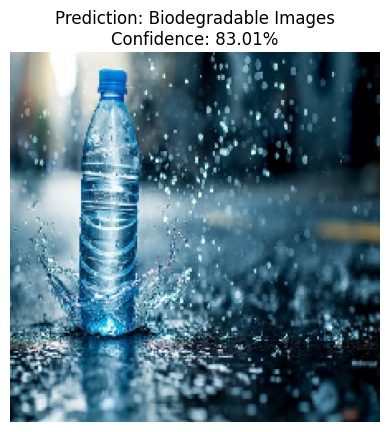

Predicted Waste Type: Biodegradable Images
Confidence Score: 83.01%


In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import urllib.request

# Load trained model
model_path = "/content/drive/MyDrive/VGG16_CleanTech_Waste_Model.h5"
model = tf.keras.models.load_model(model_path)

# Class labels (MATCH your dataset folder names)
class_names = ['Trash Images', 'Biodegradable Images', 'Recyclable Images']

def predict_waste(img_path_or_url):
    # If URL, download image
    if img_path_or_url.startswith("http"):
        local_path = "/content/temp.jpg"
        urllib.request.urlretrieve(img_path_or_url, local_path)
        img_path = local_path
    else:
        img_path = img_path_or_url

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]
    confidence = np.max(predictions) * 100

    # Display image + result
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

    print("Predicted Waste Type:", predicted_class)
    print("Confidence Score:", f"{confidence:.2f}%")

# Test with URL OR Local Image
test_image_path = "https://t3.ftcdn.net/jpg/07/86/76/06/360_F_786760607_IwcScz3k7Efj42i1S7mnewhWQXrhAa0o.jpg"

predict_waste(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


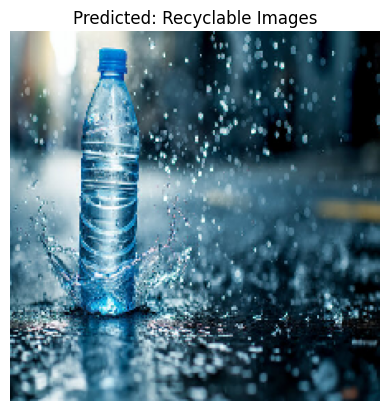

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import urllib.request
import os # Import os for path manipulation

img_url = "https://t3.ftcdn.net/jpg/07/86/76/06/360_F_786760607_IwcScz3k7Efj42i1S7mnewhWQXrhAa0o.jpg"
local_img_path = "/content/temp_prediction_image.jpg" # Temporary local path

# Download image from URL
urllib.request.urlretrieve(img_url, local_img_path)
img_path = local_img_path # Use the local path for loading

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255

prediction = model.predict(img_array)
class_names = list(train_data.class_indices.keys())

predicted_class = class_names[np.argmax(prediction)]

plt.imshow(img)
plt.title("Predicted: " + predicted_class)
plt.axis('off')
plt.show()

# Clean up the temporary file
os.remove(local_img_path)

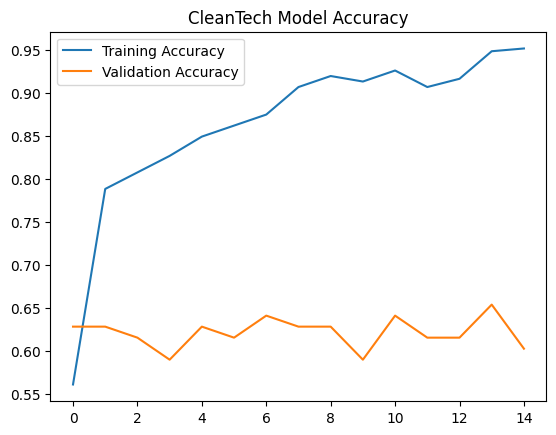

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CleanTech Model Accuracy")
plt.show()


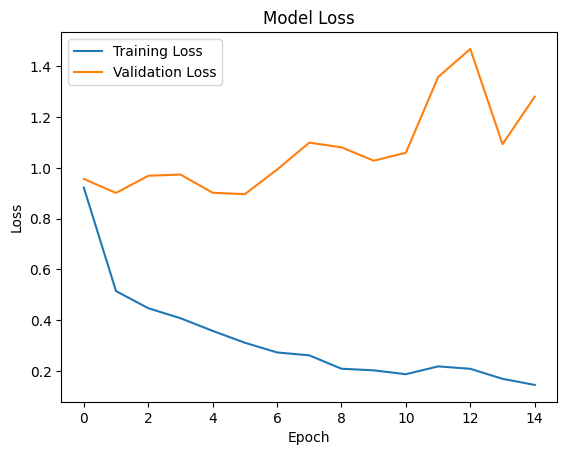

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 12s/step


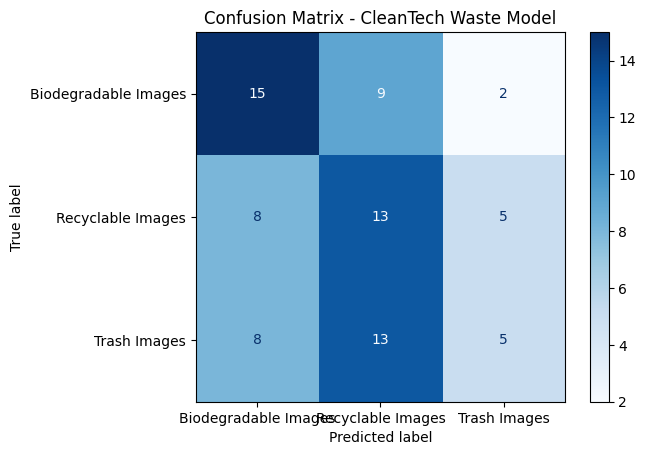

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = val_data.classes
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(cm, display_labels=list(train_data.class_indices.keys()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CleanTech Waste Model")
plt.show()
